In this notebook...

Experiment with Facebook's new forecasting procedure for time-series data (https://facebook.github.io/prophet/) on Bitcoin Pricing Data.

In [99]:
from fbprophet import Prophet
import pandas as pd
import numpy as np

In [100]:
BTC_df = pd.read_csv('market-price.csv', header=None, parse_dates=True)
BTC_df.columns = ['ds','y']

In [101]:
BTC_df.head()

,ds,y
0,2009-01-03 00:00:00,0.0
1,2009-01-05 00:00:00,0.0
2,2009-01-07 00:00:00,0.0
3,2009-01-09 00:00:00,0.0
4,2009-01-11 00:00:00,0.0


In [102]:
BTC_df.describe()

,y
count,1671.000000
mean,800.961925
std,2298.758339
min,0.000000
25%,1.145000
50%,122.405100
75%,558.900000
max,19289.785000


In [103]:
BTC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
ds    1671 non-null object
y     1671 non-null float64
dtypes: float64(1), object(1)
memory usage: 26.2+ KB


In [104]:
BTC_df['ds'] = pd.to_datetime(BTC_df['ds'])

In [105]:
BTC_df.head()

,ds,y
0,2009-01-03,0.0
1,2009-01-05,0.0
2,2009-01-07,0.0
3,2009-01-09,0.0
4,2009-01-11,0.0


In [106]:
# instantiating model
# model DF cols must be labelled "ds" and "y"

m = Prophet(interval_width=0.95, daily_seasonality=True)
m.fit(BTC_df);

In [107]:
# export out forecast
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2031,2019-02-21
2032,2019-02-22
2033,2019-02-23
2034,2019-02-24
2035,2019-02-25


In [108]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2031,2019-02-21,13061.209120,10514.418800,15619.066325
2032,2019-02-22,13070.680434,10604.019939,15397.434797
2033,2019-02-23,13092.346240,10613.083212,15642.877164
2034,2019-02-24,13101.393167,10657.167029,15591.732775
2035,2019-02-25,13089.864179,10553.608748,15354.193860


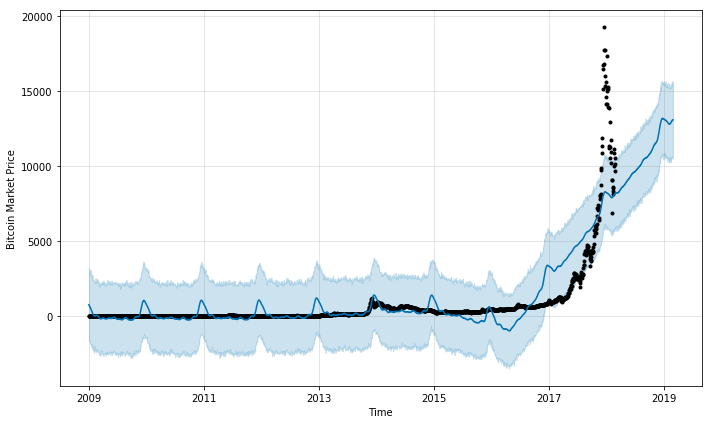

In [114]:
m.plot(forecast, ylabel='Bitcoin Market Price', xlabel='Time')

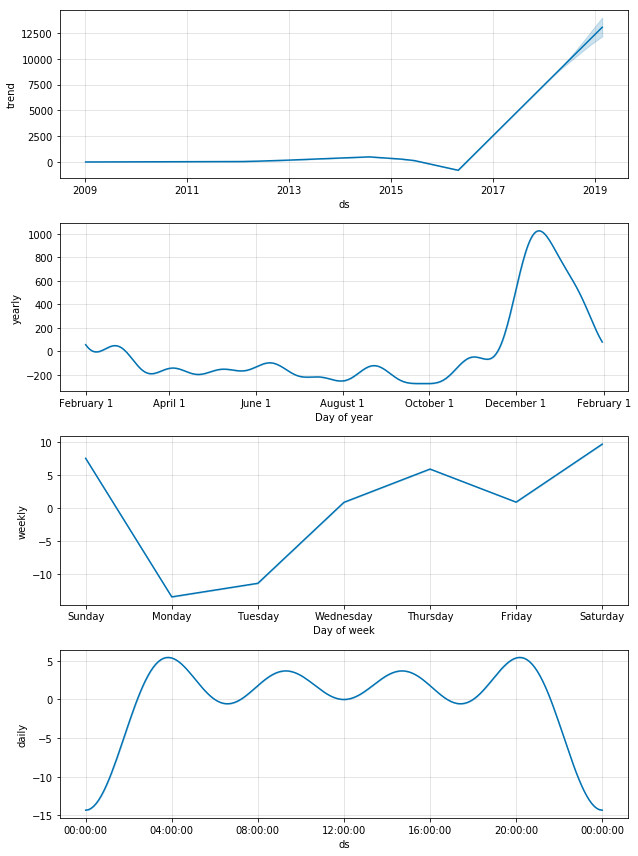

In [118]:
# plotting individual components of the forecast
m.plot_components(forecast, yearly_start=31)

In the trend subplot, the model characterizes a change in trend happening in 2016.  This warrants more research on what happened and maybe can determine a pivotal moment in Bitcoin history. 

It's also interesting to see some market dynamics similar to the stock market where we see a reversion to the mean.  Suggesting the December 2017 bubble has popped and resuming a normal price growth trajectory. 

In [111]:
m?

Type:        Prophet
String form: <fbprophet.forecaster.Prophet object at 0x0000023DEBAC8828>
File:        c:\users\garrick\anaconda3\lib\site-packages\fbprophet\forecaster.py
Docstring:  
Prophet forecaster.

Parameters
----------
growth: String 'linear' or 'logistic' to specify a linear or logistic
    trend.
changepoints: List of dates at which to include potential changepoints. If
    not specified, potential changepoints are selected automatically.
n_changepoints: Number of potential changepoints to include. Not used
    if input `changepoints` is supplied. If `changepoints` is not supplied,
    then n_changepoints potential changepoints are selected uniformly from
    the first 80 percent of the history.
yearly_seasonality: Fit yearly seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
weekly_seasonality: Fit weekly seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
daily_seasonality: Fit daily seasonality.
  

In [112]:
m.predict?

Signature: m.predict(df=None)
Docstring:
Predict using the prophet model.

Parameters
----------
df: pd.DataFrame with dates for predictions (column ds), and capacity
    (column cap) if logistic growth. If not provided, predictions are
    made on the history.

Returns
-------
A pd.DataFrame with the forecast components.
File:      c:\users\garrick\anaconda3\lib\site-packages\fbprophet\forecaster.py
Type:      method


In [113]:
m.plot?

Signature: m.plot(fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y')
Docstring:
Plot the Prophet forecast.

Parameters
----------
fcst: pd.DataFrame output of self.predict.
ax: Optional matplotlib axes on which to plot.
uncertainty: Optional boolean to plot uncertainty intervals.
plot_cap: Optional boolean indicating if the capacity should be shown
    in the figure, if available.
xlabel: Optional label name on X-axis
ylabel: Optional label name on Y-axis

Returns
-------
A matplotlib figure.
File:      c:\users\garrick\anaconda3\lib\site-packages\fbprophet\forecaster.py
Type:      method


In [115]:
m.plot_components?

Signature: m.plot_components(fcst, uncertainty=True, plot_cap=True, weekly_start=0, yearly_start=0)
Docstring:
Plot the Prophet forecast components.

Will plot whichever are available of: trend, holidays, weekly
seasonality, and yearly seasonality.

Parameters
----------
fcst: pd.DataFrame output of self.predict.
uncertainty: Optional boolean to plot uncertainty intervals.
plot_cap: Optional boolean indicating if the capacity should be shown
    in the figure, if available.
weekly_start: Optional int specifying the start day of the weekly
    seasonality plot. 0 (default) starts the week on Sunday. 1 shifts
    by 1 day to Monday, and so on.
yearly_start: Optional int specifying the start day of the yearly
    seasonality plot. 0 (default) starts the year on Jan 1. 1 shifts
    by 1 day to Jan 2, and so on.

Returns
-------
A matplotlib figure.
File:      c:\users\garrick\anaconda3\lib\site-packages\fbprophet\forecaster.py
Type:      method
